<a href="https://colab.research.google.com/github/fabian692/redes-neuronales-tesis/blob/main/red_neuronal_convolucional_ver_Enero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import keras
import sklearn
from keras.optimizers import *
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.optimizers import *
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn import metrics
%matplotlib inline 
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score, auc
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

In [ ]:
cid1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
cid2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
cid3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
cid4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
cid5 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
cid6 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
cid7 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
cid8 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


In [ ]:
cid1.rename({' Label': 'Label'}, axis=1,inplace=True)
cid2.rename({' Label': 'Label'}, axis=1,inplace=True)
cid3.rename({' Label': 'Label'}, axis=1,inplace=True)
cid4.rename({' Label': 'Label'}, axis=1,inplace=True)
cid5.rename({' Label': 'Label'}, axis=1,inplace=True)
cid6.rename({' Label': 'Label'}, axis=1,inplace=True)
cid7.rename({' Label': 'Label'}, axis=1,inplace=True)
cid8.rename({' Label': 'Label'}, axis=1,inplace=True)

In [ ]:
cid2=cid2[cid2.Label == 'BENIGN']
cid3=cid3[cid3.Label == 'BENIGN']
cid5=cid5[cid5.Label == 'BENIGN']
cid6=cid6[cid6.Label == 'BENIGN']
cid7=cid7[cid7.Label == 'BENIGN']
cid8=cid8[cid8.Label != 'Heartbleed']
cicids= pd.concat([cid1,cid2,cid3,cid4,cid5,cid6,cid7,cid8])

In [ ]:
cicids.shape

(2653785, 79)

In [ ]:
cicids.groupby('Label').size()

Label
BENIGN              2273097
DDoS                 128027
DoS GoldenEye         10293
DoS Hulk             231073
DoS Slowhttptest       5499
DoS slowloris          5796
dtype: int64

In [ ]:
cicids = cicids.drop([' Fwd Header Length.1'], axis=1)
cicids.columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label']

In [ ]:
cicids.shape

#datos con limpieza de protocolos

In [ ]:
cid12= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowlorisgo.csv")
cid12=cid12.assign(Label="DoS slowloris")
cid12=cid12.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid13= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/goldenmod.csv")
cid13=cid13.assign(Label="DoS GoldenEye")
cid13=cid13.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid14= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicgenericboost.csv")
cid14=cid14.assign(Label="DDoS")
cid14=cid14.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid15= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hulkgo (1).csv")
cid15=cid15.assign(Label="DoS Hulk")
cid15=cid15.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid16= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loichttp.csv")
cid16=cid16.assign(Label="DDoS")
cid16=cid16.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid17= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loictcp.csv")
cid17=cid17.assign(Label="DDoS")
cid17=cid17.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid18= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loictcp1.csv")
cid18=cid18.assign(Label="DDoS")
cid18=cid18.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid19= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loicudp.csv")
cid19=cid19.assign(Label="DDoS")
cid19=cid19.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid20= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowhttptest.csv")
cid20=cid20.assign(Label="DoS Slowhttptest")
cid20=cid20.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid21= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowlorisgo.csv")
cid21=cid21.assign(Label="DoS slowloris")
cid21=cid21.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
#
cid30=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-103552.pcap.csv")
cid30=cid30.assign(Label="BENIGN")
cid30=cid30.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid31=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-150634.pcap.csv")
cid31=cid31.assign(Label="BENIGN")
cid31=cid31.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid32=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-154833.pcap.csv")
cid32=cid32.assign(Label="BENIGN")
cid32=cid32.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid33=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221227-175005.pcap.csv")
cid33=cid33.assign(Label="BENIGN")
cid33=cid33.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid34=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/benignonuevacaptura.csv")
cid34=cid34.assign(Label="BENIGN")
cid34=cid34.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])

#
cicids=pd.concat([cicids,cid12,cid13,cid14,cid15,cid16,cid17,cid18,cid19,cid20,cid21,cid30,cid31,cid32,cid33,cid34])
cicids=cicids.sort_values('Label')


In [ ]:
cicids.shape

#datos viejos

In [ ]:
cid12= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/DDOS (1).csv")
cid12=cid12.assign(Label="DDoS")
cid12=cid12.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid13=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Doshulk (1).csv")
cid13=cid13.assign(Label="DoS Hulk")
cid13=cid13.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid14=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Slowloris (1).csv")
cid14=cid14.assign(Label="DoS slowloris")
cid14=cid14.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid15=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Benignos.csv")
cid15=cid15.assign(Label="BENIGN")
cid15=cid15.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid16=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/benigno.csv")
cid16=cid16.assign(Label="BENIGN")
cid16=cid16.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid17=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/GoldenE.csv")
cid17=cid17.assign(Label="DoS GoldenEye")
cid17=cid17.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid18=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Goldeneye.csv")
cid18=cid18.assign(Label="DoS GoldenEye")
cid18=cid18.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid19=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/httptest.csv")
cid19=cid19.assign(Label="DoS Slowhttptest")
cid19=cid19.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid20=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/httptest1.csv")
cid20=cid20.assign(Label="DoS Slowhttptest")
cid20=cid20.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
#nuevos datos
cid21=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicfull.csv")
cid21=cid21.assign(Label="DDoS")
cid21=cid21.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid22=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicgenericb.csv")
cid22=cid22.assign(Label="DDoS")
cid22=cid22.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid23=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicducht.csv")
cid23=cid23.assign(Label="DDoS")
cid23=cid23.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid24=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicuserag.csv")
cid24=cid24.assign(Label="DDoS")
cid24=cid24.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid25=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicvisa.csv")
cid25=cid25.assign(Label="DDoS")
cid25=cid25.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid26=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hulkgo.csv")
cid26=cid26.assign(Label="DoS Hulk")
cid26=cid26.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid27=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowlorisnuevo.csv")
cid27=cid27.assign(Label="DoS slowloris")
cid27=cid27.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid28=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/dosgoldeneyegetnuevo.csv")
cid28=cid28.assign(Label="DoS GoldenEye")
cid28=cid28.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid29=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/dosgoldeneyegetnuev.csv")
cid29=cid29.assign(Label="DoS GoldenEye")
cid29=cid29.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
#nuevos datos
cid30=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-103552.pcap.csv")
cid30=cid30.assign(Label="BENIGN")
cid30=cid30.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid31=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-150634.pcap.csv")
cid31=cid31.assign(Label="BENIGN")
cid31=cid31.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid32=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-154833.pcap.csv")
cid32=cid32.assign(Label="BENIGN")
cid32=cid32.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid33=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221227-175005.pcap.csv")
cid33=cid33.assign(Label="BENIGN")
cid33=cid33.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid34=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/benignonuevacaptura.csv")
cid34=cid34.assign(Label="BENIGN")
cid34=cid34.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])

cicids=pd.concat([cicids,cid12,cid13,cid14,cid15,cid16,cid17,cid18,cid19,cid20,cid21,cid22,cid23,cid24,cid25,cid26,cid27,cid28,cid29,cid30,cid31,cid32,cid33,cid34])
cicids=cicids.sort_values('Label')

In [ ]:
cicids = cicids.replace([np.inf,-np.inf],0)
cicids = cicids.dropna()
cicids=cicids.sort_values('Label')

In [ ]:
cicids.shape

In [ ]:
cicids.shape[0]

In [ ]:
cicids.index = np.arange(0,cicids.shape[0])

In [ ]:
y = cicids['Label'].values
X = cicids.drop(['Label'], axis=1).values
df2 = cicids['Label']
feat = df2.values
etiqueta = df2.unique()
X = pd.DataFrame(normalize(X))
y = preprocessing.LabelEncoder()
Y=y.fit_transform(cicids['Label'].values)
Y1=y.inverse_transform(Y)

In [ ]:
X=X.to_numpy()

In [ ]:
x_entrenamiento,x_prueba,y_entrenamiento,y_prueba = train_test_split(X,Y, test_size=0.2,random_state=42)

In [ ]:
x_prueba.shape

(593067, 77)

In [ ]:
print(x_entrenamiento.shape)
print(y_entrenamiento.shape)

(2372265, 77)
(2372265,)


In [ ]:
x_entrenamiento.shape[0]

2372265

In [ ]:
x_entrenamiento2 = x_entrenamiento.reshape((x_entrenamiento.shape[0],1,77,1))

print(x_entrenamiento2[:77])
print(x_entrenamiento2.shape)

[[[[4.36295171e-04]
   [7.33478038e-01]
   [3.29279374e-05]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]]


 [[[1.74936720e-06]
   [4.73832774e-01]
   [1.93496597e-07]
   ...
   [5.87583931e-05]
   [2.31406135e-01]
   [2.31406135e-01]]]


 [[[1.19757303e-05]
   [4.30539371e-01]
   [7.56931033e-07]
   ...
   [0.00000000e+00]
   [2.69248965e-01]
   [2.69248965e-01]]]


 ...


 [[[1.76109672e-06]
   [4.66769845e-01]
   [5.96308145e-08]
   ...
   [2.11528117e-03]
   [2.34150331e-01]
   [2.31367560e-01]]]


 [[[1.06980637e-03]
   [6.27734120e-01]
   [4.03700518e-05]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]]


 [[[4.10074417e-03]
   [8.11096992e-08]
   [1.62219398e-07]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]]]
(2372265, 1, 77, 1)


In [ ]:
from keras.layers import Conv1D, Conv2D, MaxPooling2D
import keras







from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
#from keras.optimizers import Adam

In [ ]:
from datetime import datetime
%reload_ext tensorboard
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
with tf.device('/device:GPU:0'):
  tf.keras.backend.set_floatx('float64')
  cnn = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(100,kernel_size=(1,10),strides=(1,1),padding='valid',activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(pool_size=(1,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(80, activation=tf.nn.relu),
                             tf.keras.layers.Dense(78, activation=tf.nn.softmax)])

cnn.compile(loss='SparseCategoricalCrossentropy', optimizer= tf.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'), metrics=['accuracy'])


history = cnn.fit(x_entrenamiento2,y_entrenamiento,validation_split=0.2,batch_size=200,callbacks=[tensorboard_callback],verbose=1,epochs=20)

Epoch 1/20
9490/9490 [==============================] - 79s 8ms/step - loss: 0.2025 - accuracy: 0.9348 - val_loss: 0.1282 - val_accuracy: 0.9592
Epoch 2/20
9490/9490 [==============================] - 74s 8ms/step - loss: 0.1121 - accuracy: 0.9653 - val_loss: 0.1186 - val_accuracy: 0.9651
Epoch 3/20
9490/9490 [==============================] - 75s 8ms/step - loss: 0.0957 - accuracy: 0.9709 - val_loss: 0.0961 - val_accuracy: 0.9611
Epoch 4/20
9490/9490 [==============================] - 74s 8ms/step - loss: 0.0858 - accuracy: 0.9739 - val_loss: 0.0785 - val_accuracy: 0.9780
Epoch 5/20
9490/9490 [==============================] - 75s 8ms/step - loss: 0.0792 - accuracy: 0.9762 - val_loss: 0.0694 - val_accuracy: 0.9804
Epoch 6/20
9490/9490 [==============================] - 74s 8ms/step - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.0778 - val_accuracy: 0.9770
Epoch 7/20
9490/9490 [==============================] - 74s 8ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0612 - val_ac

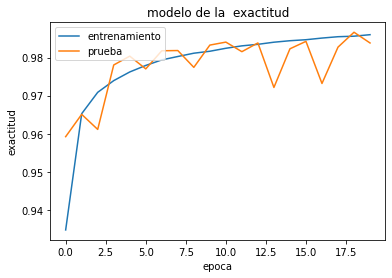

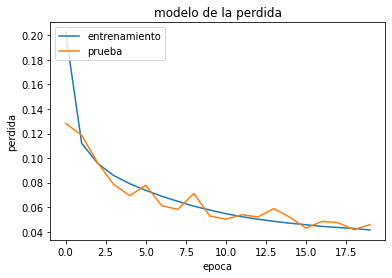

In [ ]:
# resumir la historia para la exactitud
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo de la  exactitud')
plt.ylabel('exactitud')
plt.xlabel('epoca')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.show()
# resumir la historia para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo de la perdida')
plt.ylabel('perdida')
plt.xlabel('epoca')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.show()

#Metricas en fase de entrenamiento red neuronal convolucional

In [ ]:
x_entrenamiento.shape

(2372265, 77)

In [ ]:
x_entrenamiento.shape[0]

2372265

In [ ]:
x_entrenamiento = x_entrenamiento.reshape((x_entrenamiento.shape[0],1,77,1))
print(x_entrenamiento.shape)

(2372265, 1, 77, 1)


In [ ]:
prediccion_cnn=np.argmax(cnn.predict(x_entrenamiento), axis=-1)

74134/74134 [==============================] - 104s 1ms/step


In [ ]:
x_prueba.shape

(593067, 77)

In [ ]:
x_prueba.shape[0]

593067

In [ ]:
x_prueba = x_prueba.reshape((x_prueba.shape[0],1,77,1))
print(x_prueba.shape)

(593067, 1, 77, 1)


In [ ]:
prediccion_cnn_prueba=np.argmax(cnn.predict(x_prueba), axis=-1)

18534/18534 [==============================] - 27s 1ms/step


In [ ]:
prediccion_cnn

array([0, 0, 0, ..., 0, 3, 0])

In [ ]:
prediccion_cnn.shape

(2372265,)

In [ ]:
cnnproba = cnn.predict(x_entrenamiento)

74134/74134 [==============================] - 106s 1ms/step


In [ ]:
cnnproba = cnnproba.round()

In [ ]:
cnnproba.shape

(2372265, 78)

In [ ]:
print(y_prueba.shape)

(593067,)


#Metricas red neuronal convolucional en fase de entrenamiento

In [ ]:
prediccion_cnn=np.argmax(cnn.predict(x_entrenamiento), axis=-1)

74134/74134 [==============================] - 105s 1ms/step


In [ ]:
score = metrics.accuracy_score(y_entrenamiento,prediccion_cnn)
print('Accuracy: {}'.format(score))

Accuracy: 0.9839941996362126


In [ ]:
puntaje = metrics.accuracy_score(y_entrenamiento, prediccion_cnn)
print("Puntaje de clasificación de Exactitud: {}".format(puntaje))

Puntaje de clasificación de Exactitud: 0.9839941996362126


In [ ]:
f1 = metrics.f1_score(y_entrenamiento,prediccion_cnn, average='weighted')
print('Averaged F1: {}'.format(f1))

Averaged F1: 0.9843492301071454


In [ ]:
scorerecall = metrics.recall_score(y_entrenamiento,prediccion_cnn, average= "weighted")
print("Recall score: {}".format(scorerecall))

Recall score: 0.9839941996362126


#Metricas en fase de prueba red neuronal convolucional

In [ ]:
score = metrics.accuracy_score(y_prueba,prediccion_cnn_prueba)
print('Accuracy: {}'.format(score))

Accuracy: 0.9838483678909803


In [ ]:
puntaje = metrics.accuracy_score(y_prueba,prediccion_cnn_prueba)
print("Puntaje de clasificación de Exactitud: {}".format(puntaje))

Puntaje de clasificación de Exactitud: 0.9838483678909803


In [ ]:
f1 = metrics.f1_score(y_prueba,prediccion_cnn_prueba, average='weighted')
print('Averaged F1: {}'.format(f1))

Averaged F1: 0.984199740956


In [ ]:
scorerecall = metrics.recall_score(y_prueba,prediccion_cnn_prueba, average= "weighted")
print("Recall score: {}".format(scorerecall))

Recall score: 0.9838483678909803


# Reporte de clasificacion red neuronal convolucional en fase de entrenamiento

In [ ]:
print(metrics.classification_report(y_entrenamiento,prediccion_cnn,target_names=etiqueta,digits = 4))

                  precision    recall  f1-score   support

          BENIGN     0.9962    0.9896    0.9929   1830889
            DDoS     0.9913    0.9885    0.9899    217046
   DoS GoldenEye     0.7283    0.9774    0.8347     32319
        DoS Hulk     0.9636    0.9835    0.9734    231026
DoS Slowhttptest     0.7212    0.8555    0.7826     20589
   DoS slowloris     0.9415    0.7806    0.8536     40396

        accuracy                         0.9840   2372265
       macro avg     0.8904    0.9292    0.9045   2372265
    weighted avg     0.9856    0.9840    0.9843   2372265



# Reporte de clasificacion red neuronal convolucional en fase de prueba

In [ ]:
print(metrics.classification_report(y_prueba,prediccion_cnn_prueba,target_names=etiqueta,digits = 4))

                  precision    recall  f1-score   support

          BENIGN     0.9959    0.9896    0.9928    456983
            DDoS     0.9919    0.9881    0.9900     54821
   DoS GoldenEye     0.7259    0.9769    0.8329      8058
        DoS Hulk     0.9641    0.9827    0.9733     57933
DoS Slowhttptest     0.7239    0.8478    0.7810      5192
   DoS slowloris     0.9379    0.7805    0.8520     10080

        accuracy                         0.9838    593067
       macro avg     0.8899    0.9276    0.9037    593067
    weighted avg     0.9854    0.9838    0.9842    593067



#Curva ROC cnn fase de entrenamiento

---



In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Binarizar la salida
y_cnn = label_binarize(Y, classes=[0,1,2,3,4,5])
n_classes = y_cnn.shape[1]

# barajar y dividir los conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y_cnn, test_size=0.2,random_state=42)

In [ ]:
X_entrenamiento.shape

(2372265, 77)

In [ ]:
X_entrenamiento = X_entrenamiento.reshape((X_entrenamiento.shape[0],1,77,1))
print(X_entrenamiento.shape)

(2372265, 1, 77, 1)


In [ ]:
calsificador_cnn=cnn.predict(X_entrenamiento,batch_size=200)

11862/11862 [==============================] - 29s 2ms/step


In [ ]:
calsificador_cnn=calsificador_cnn.round()

In [ ]:
calsificador_cnn

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_entrenamiento

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

<ipython-input-62-9d89254d98ed>:22: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


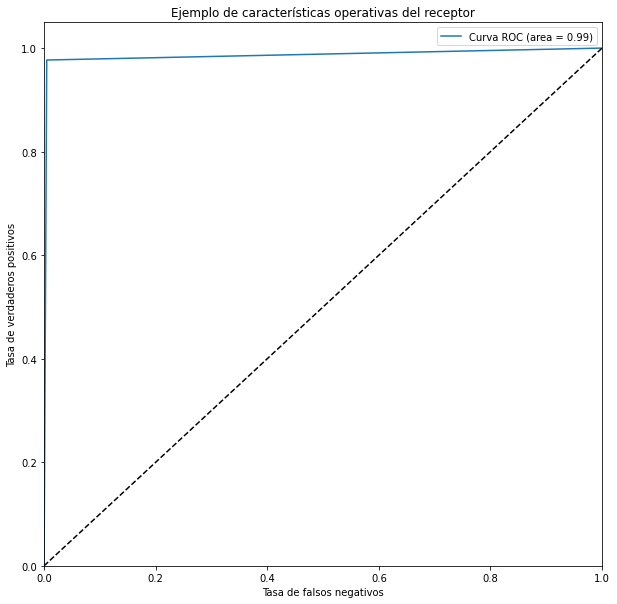

<ipython-input-62-9d89254d98ed>:40: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


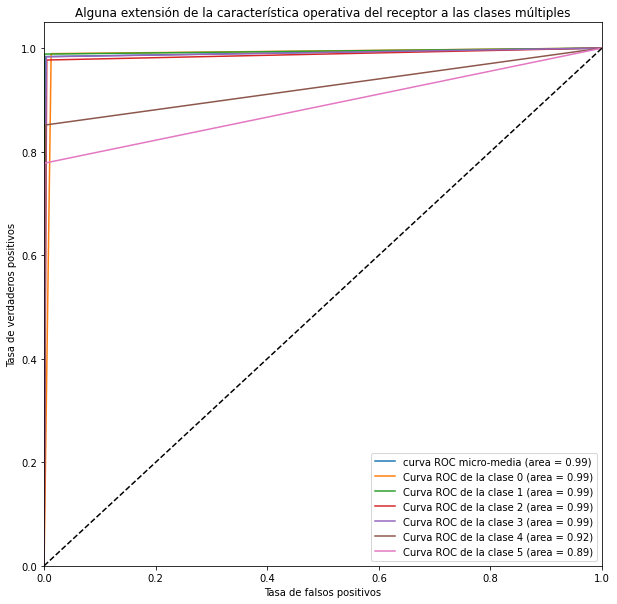

In [ ]:
# Calcular la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_entrenamiento[:, i], calsificador_cnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC micro-media y el área ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_entrenamiento.ravel(), calsificador_cnn[:,:6].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Gráfico de una curva ROC para una clase específica
plt.figure(figsize=(10,10))
plt.plot(fpr[2], tpr[2], label='Curva ROC (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos negativos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Ejemplo de características operativas del receptor')
plt.legend(loc="inferior derecha")
plt.show()

# Trazado de la curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='curva ROC micro-media (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de la clase {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Alguna extensión de la característica operativa del receptor a las clases múltiples')
plt.legend(loc="inferior derecha")
plt.show()

#Curva ROC de CNN en fase de prueba

---



In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Binarizar la salida
y_cnn = label_binarize(Y, classes=[0,1,2,3,4,5])
n_classes = y_cnn.shape[1]

# barajar y dividir los conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y_cnn, test_size=0.2,random_state=42)

In [ ]:
X_prueba.shape

(593067, 77)

In [ ]:
X_prueba = X_prueba.reshape((X_prueba.shape[0],1,77,1))
print(X_prueba.shape)

(593067, 1, 77, 1)


In [ ]:
clasificador_cnn=cnn.predict(X_prueba)

18534/18534 [==============================] - 27s 1ms/step


In [ ]:
clasificador_cnn = clasificador_cnn.round()

In [ ]:
clasificador_cnn

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_prueba

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

<ipython-input-71-6fb70678dc33>:22: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


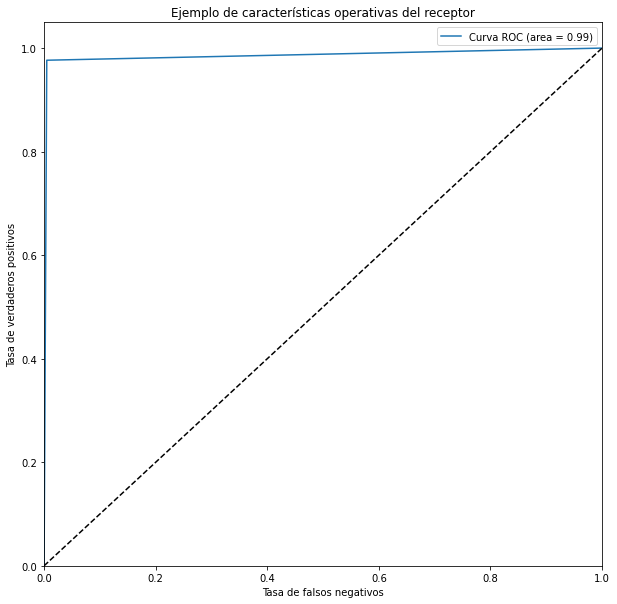

<ipython-input-71-6fb70678dc33>:40: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


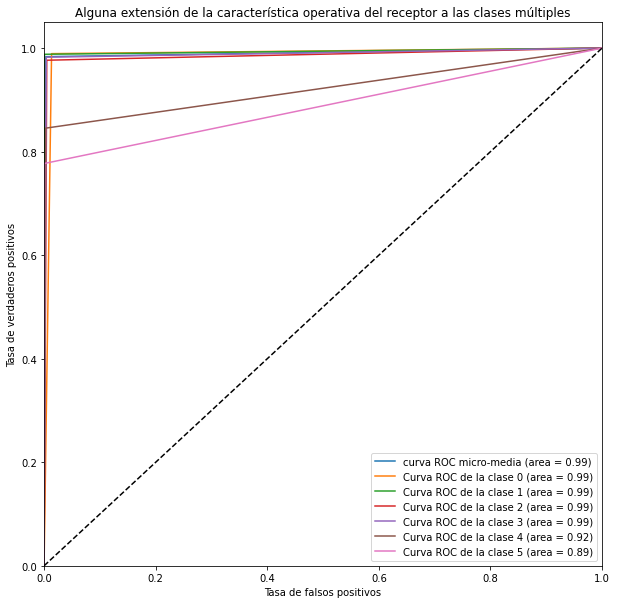

In [ ]:
# Calcular la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_prueba[:, i], clasificador_cnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC micro-media y el área ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_prueba.ravel(), clasificador_cnn[:,:6].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Gráfico de una curva ROC para una clase específica
plt.figure(figsize=(10,10))
plt.plot(fpr[2], tpr[2], label='Curva ROC (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos negativos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Ejemplo de características operativas del receptor')
plt.legend(loc="inferior derecha")
plt.show()

# Trazado de la curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='curva ROC micro-media (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de la clase {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Alguna extensión de la característica operativa del receptor a las clases múltiples')
plt.legend(loc="inferior derecha")
plt.show()

#Matriz de Confusion Red Neurona Convolucional

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_entrenamiento,x_prueba,y_entrenamiento,y_prueba = train_test_split(X,Y, test_size=0.2,random_state=42)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(15,15))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiquetas Verdaderas')
    plt.xlabel('Etiquetas predichas')
    plt.tight_layout()

#Matriz de confusion red neuronal convolucional en fase de entrenamiento

Confusion matrix, without normalization
[[1811787    1205    9808    7479     497     113]
 [    381  214560    1530     553       5      17]
 [    470       7   31589      17      33     203]
 [   2379     545      51  227211      56     784]
 [   1918      72      77      68   17613     841]
 [   1809      46     319     468    6219   31535]]


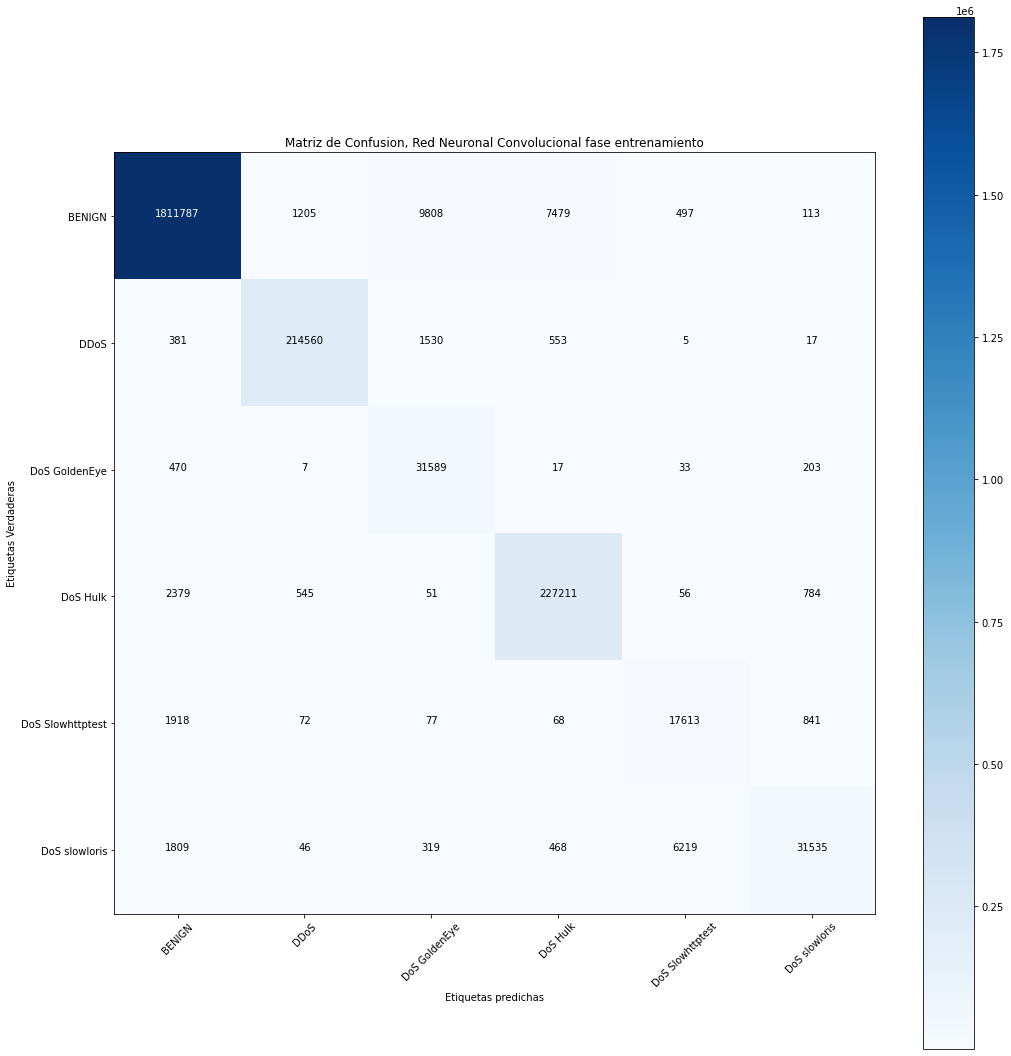

In [ ]:
cnf_matrix = confusion_matrix(y_entrenamiento,prediccion_cnn,labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)


plot_confusion_matrix(cnf_matrix, classes=etiqueta,title='Matriz de Confusion, Red Neuronal Convolucional fase entrenamiento')

# Matris de confusion red neuronal convolucional en fase de prueba

Confusion matrix, without normalization
[[452246    279   2461   1852    117     28]
 [   105  54168    402    141      3      2]
 [   128      2   7872      4      4     48]
 [   618    138     17  56933     16    211]
 [   501     17     19     21   4402    232]
 [   494      6     74    100   1539   7867]]


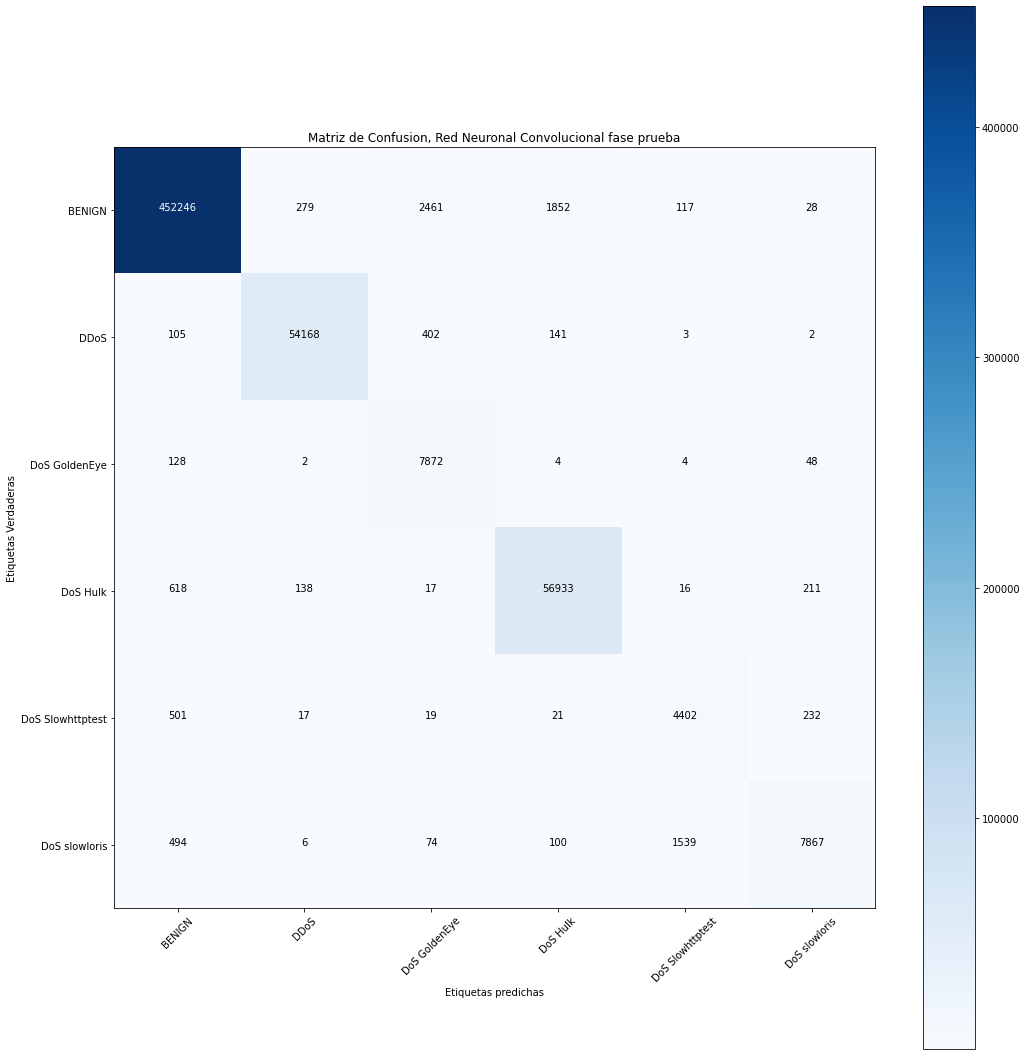

In [ ]:
cnf_matrix = confusion_matrix(y_prueba,prediccion_cnn_prueba,labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)


plot_confusion_matrix(cnf_matrix, classes=etiqueta,title='Matriz de Confusion, Red Neuronal Convolucional fase prueba')

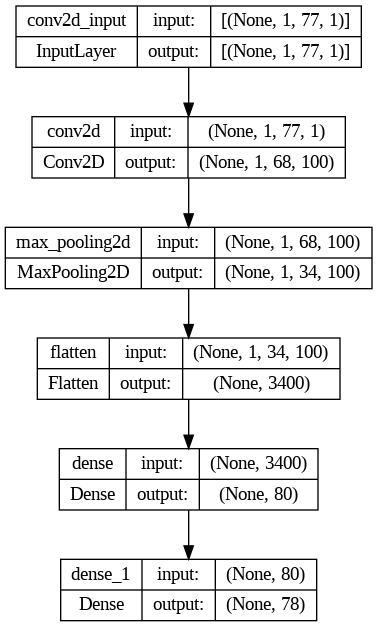

In [ ]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

#Guardado del modelo y prediccion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cnn.save("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/redneuronalconvolucional_ver_Enero.h5")

In [ ]:
new_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/redneuronalconvolucional_ver_Enero.h5')

In [ ]:
prueba=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-150634.pcap.csv")

In [ ]:
prueba.shape[0]

2912

In [ ]:
prueba=prueba.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min'])
prueba = prueba.replace([np.inf,-np.inf],0)
prueba = prueba.values
norm= pd.DataFrame(normalize(prueba))

In [ ]:
kkl=norm.shape[1]
kkl

77

In [ ]:
kkl=np.array(kkl)

In [ ]:
llk=norm.shape[0]
llk

2912

In [ ]:
llk=np.array(llk)
llk

array(2912)

In [ ]:
norm=norm.to_numpy()

In [ ]:
norm.shape

(2912, 77)

In [ ]:
norm=norm.reshape((llk,1,kkl,1))
norm.shape

(2912, 1, 77, 1)

In [ ]:
def prediccion(norm):
  return np.argmax(new_model.predict(norm),axis=1)

In [ ]:
prediccion(norm)

91/91 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(["BENIGN","DDoS", "DoS GoldenEye","DoS Hulk","DoS Slowhttptest","DoS slowloris"])
LabelEncoder()
ññ=le.inverse_transform(prediccion(norm))
ññ

91/91 [==============================] - 0s 2ms/step


array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype='<U16')

In [ ]:
yu=pd.DataFrame(ññ)

In [ ]:
yu.rename({0: 'Total'}, axis=1,inplace=True)

In [ ]:
yu.shape[0]

2912

In [ ]:
print('Registros :',yu.shape[0],' ',yu.groupby('Total').size())

Registros : 2912   Total
BENIGN              2794
DDoS                  32
DoS GoldenEye          7
DoS Hulk              68
DoS Slowhttptest       3
DoS slowloris          8
dtype: int64


In [ ]:
import seaborn as sns

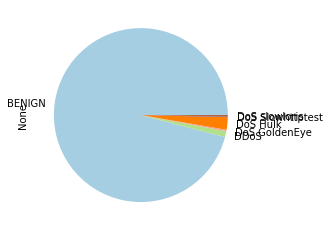

In [ ]:
yu.groupby('Total').size().plot(kind='pie',cmap='Paired')


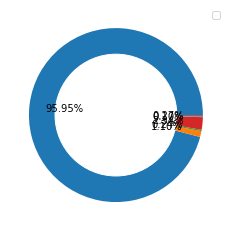

In [ ]:
# library
import matplotlib.pyplot as plt

# create data
#size_of_groups=[12,11,3,30]
label=["BENIGN", "DDoS", "DoS GoldenEye","DoS Hulk","DoS Slowhttptest","DoS slowloris"]
# Create a pieplot
plt.pie(x=yu.groupby('Total').size(),autopct='%.2f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()